## Get data

In [ ]:
# !pip install openpyxl

import pandas as pd
import scipy.stats as stats
import matplotlib.pyplot as plt

from google.colab import files
uploaded = files.upload()

df = pd.read_excel('Comparison.xlsx')

sus_a = df['SUS_A'].dropna()
sus_b = df['SUS_B'].dropna()

shapiro_a = stats.shapiro(sus_a)
shapiro_b = stats.shapiro(sus_b)
print("Shapiro-Wilk Test for SUS_A:", shapiro_a)
print("Shapiro-Wilk Test for SUS_B:", shapiro_b)

levene_test = stats.levene(sus_a, sus_b)
print("Levene's Test:", levene_test)

Saving Comparison.xlsx to Comparison.xlsx
Shapiro-Wilk Test for SUS_A: ShapiroResult(statistic=np.float64(0.9309499153806816), pvalue=np.float64(0.05204266534026977))
Shapiro-Wilk Test for SUS_B: ShapiroResult(statistic=np.float64(0.9058877906325571), pvalue=np.float64(0.011736658419049386))
Levene's Test: LeveneResult(statistic=np.float64(0.009176892514327906), pvalue=np.float64(0.9240127422262906))


## QQ Plot and Histogram

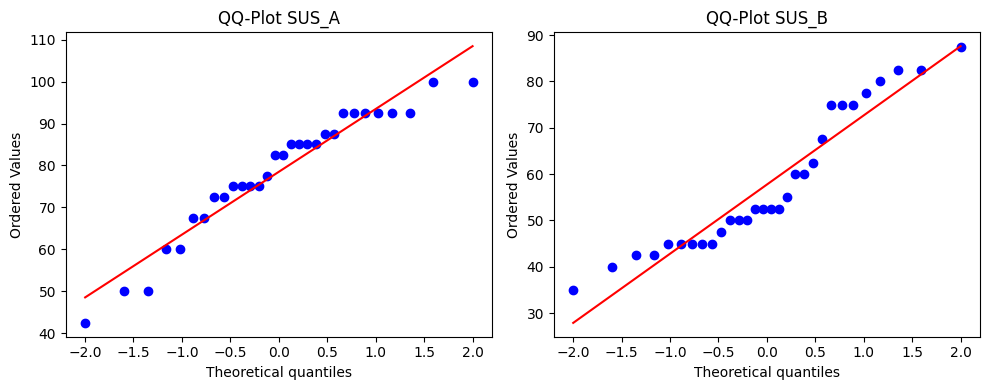

In [ ]:
import numpy as np
fig, axs = plt.subplots(1, 2, figsize=(10, 4))
stats.probplot(sus_a, dist="norm", plot=axs[0])
axs[0].set_title("QQ-Plot SUS_A")
stats.probplot(sus_b, dist="norm", plot=axs[1])
axs[1].set_title("QQ-Plot SUS_B")
plt.tight_layout()
plt.show()

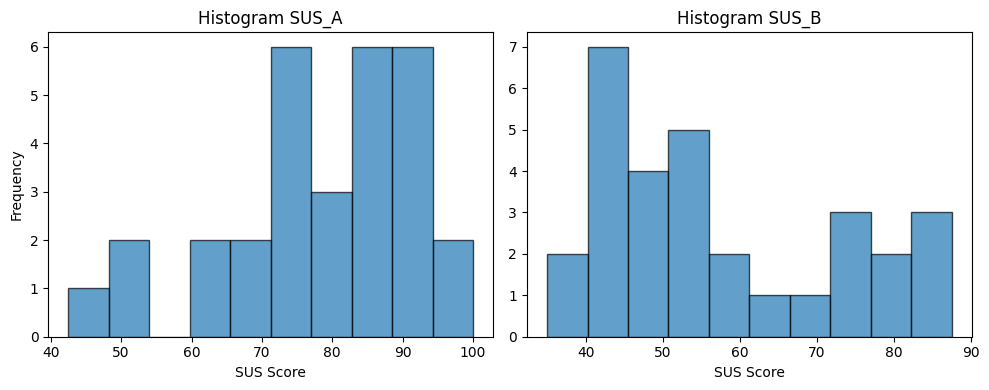

In [ ]:
# --- Histograms ---
fig, axs = plt.subplots(1, 2, figsize=(10, 4))
axs[0].hist(sus_a, bins=10, alpha=0.7, edgecolor="k")
axs[0].set_title("Histogram SUS_A")
axs[0].set_xlabel('SUS Score')
axs[0].set_ylabel('Frequency')
axs[1].hist(sus_b, bins=10, alpha=0.7, edgecolor="k")
axs[1].set_title("Histogram SUS_B")
axs[1].set_xlabel('SUS Score')
plt.tight_layout()
plt.show()

## Box plot

<ipython-input-5-1076901691>:2: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  plt.boxplot([sus_a, sus_b], labels=['SUS_A (Standard)', 'SUS_B (Metaphor-based)'])


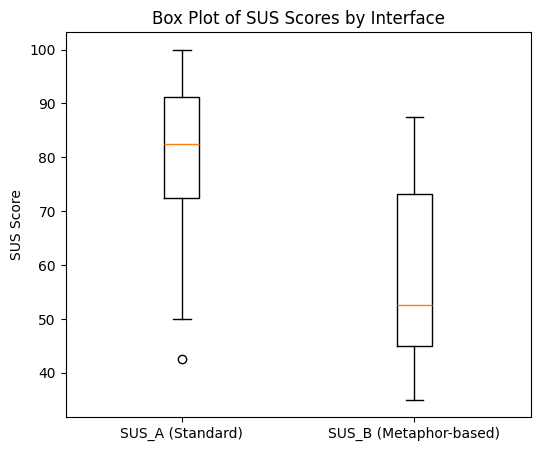

In [ ]:
plt.figure(figsize=(6, 5))
plt.boxplot([sus_a, sus_b], labels=['SUS_A (Standard)', 'SUS_B (Metaphor-based)'])
plt.ylabel('SUS Score')
plt.title('Box Plot of SUS Scores by Interface')
plt.show()

## Wilcoxon signed-rank test (one-tail)

In [ ]:
# testing SUS_B > SUS_A

wilcoxon_result = stats.wilcoxon(sus_b, sus_a, alternative='greater')
print("Wilcoxon signed-rank test (one-tailed):", wilcoxon_result)
print(np.mean(sus_b))
print(np.mean(sus_a))

Wilcoxon signed-rank test (one-tailed): WilcoxonResult(statistic=np.float64(63.0), pvalue=np.float64(0.9997575933901303))
57.75
78.5


In [ ]:
diff = sus_b - sus_a
abs_diff = abs(diff)
ranks = abs_diff.rank()
signed_ranks = ranks * np.sign(diff)
signed_ranks_df = pd.DataFrame({
    "SUS_A": sus_a,
    "SUS_B": sus_b,
    "Diff (B-A)": diff,
    "Abs Diff": abs_diff,
    "Rank": ranks,
    "Signed Rank": signed_ranks
})
print("\nSigned Ranks Table:\n", signed_ranks_df)


Signed Ranks Table:
     SUS_A  SUS_B  Diff (B-A)  Abs Diff  Rank  Signed Rank
0    72.5   87.5        15.0      15.0  10.5         10.5
1    60.0   75.0        15.0      15.0  10.5         10.5
2    50.0   82.5        32.5      32.5  17.0         17.0
3    87.5   77.5       -10.0      10.0   6.0         -6.0
4    82.5   50.0       -32.5      32.5  17.0        -17.0
5    92.5   52.5       -40.0      40.0  21.0        -21.0
6    75.0   60.0       -15.0      15.0  10.5        -10.5
7    92.5   47.5       -45.0      45.0  25.5        -25.5
8    92.5   45.0       -47.5      47.5  27.5        -27.5
9    85.0   42.5       -42.5      42.5  23.5        -23.5
10   85.0   45.0       -40.0      40.0  21.0        -21.0
11   67.5   75.0         7.5       7.5   3.0          3.0
12  100.0   45.0       -55.0      55.0  30.0        -30.0
13   77.5   52.5       -25.0      25.0  14.0        -14.0
14   87.5   42.5       -45.0      45.0  25.5        -25.5
15   60.0   50.0       -10.0      10.0   6.0      